# Task 1
https://blog.tensorflow.org/2021/05/introducing-tensorflow-decision-forests.html
https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/
https://machinelearningmastery.com/difference-between-a-batch-and-an-epoch/
https://www.tensorflow.org/api_docs/python/tf/keras/regularizers/L1
https://johnthas.medium.com/regularization-in-tensorflow-using-keras-api-48aba746ae21
https://www.tensorflow.org/api_docs/python/tf/keras/Sequential
https://stats.stackexchange.com/questions/184019/when-will-l1-regularization-work-better-than-l2-and-vice-versa


# Task 2


In [40]:
!pip install tensorflow_decision_forests

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [41]:
# Some of the steps in this task are identical to the ones in the last homework

# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
import tensorflow_decision_forests as tfdf
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow import keras
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from numpy import mean
from numpy import std
import time
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# upload and read the file
# https://www.kaggle.com/datasets/deepcontractor/smoke-detection-dataset?resource=download
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
df = pd.read_csv('drive/MyDrive/datasets/smoke_detection_iot.csv')

Mounted at /content/drive


In [ ]:
df.rename(columns = {"Fire Alarm": "Fire_Alarm"}, inplace = True)

In [ ]:
# Detects missing values
df.isna().sum()

Unnamed: 0        0
UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire_Alarm        0
dtype: int64

In [ ]:
# Describes the statistics of the numerical data
df.describe()

,Unnamed: 0,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire_Alarm
count,62630.000000,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,31314.500000,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,18079.868017,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,0.000000,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15657.250000,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,31314.500000,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,46971.750000,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,62629.000000,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


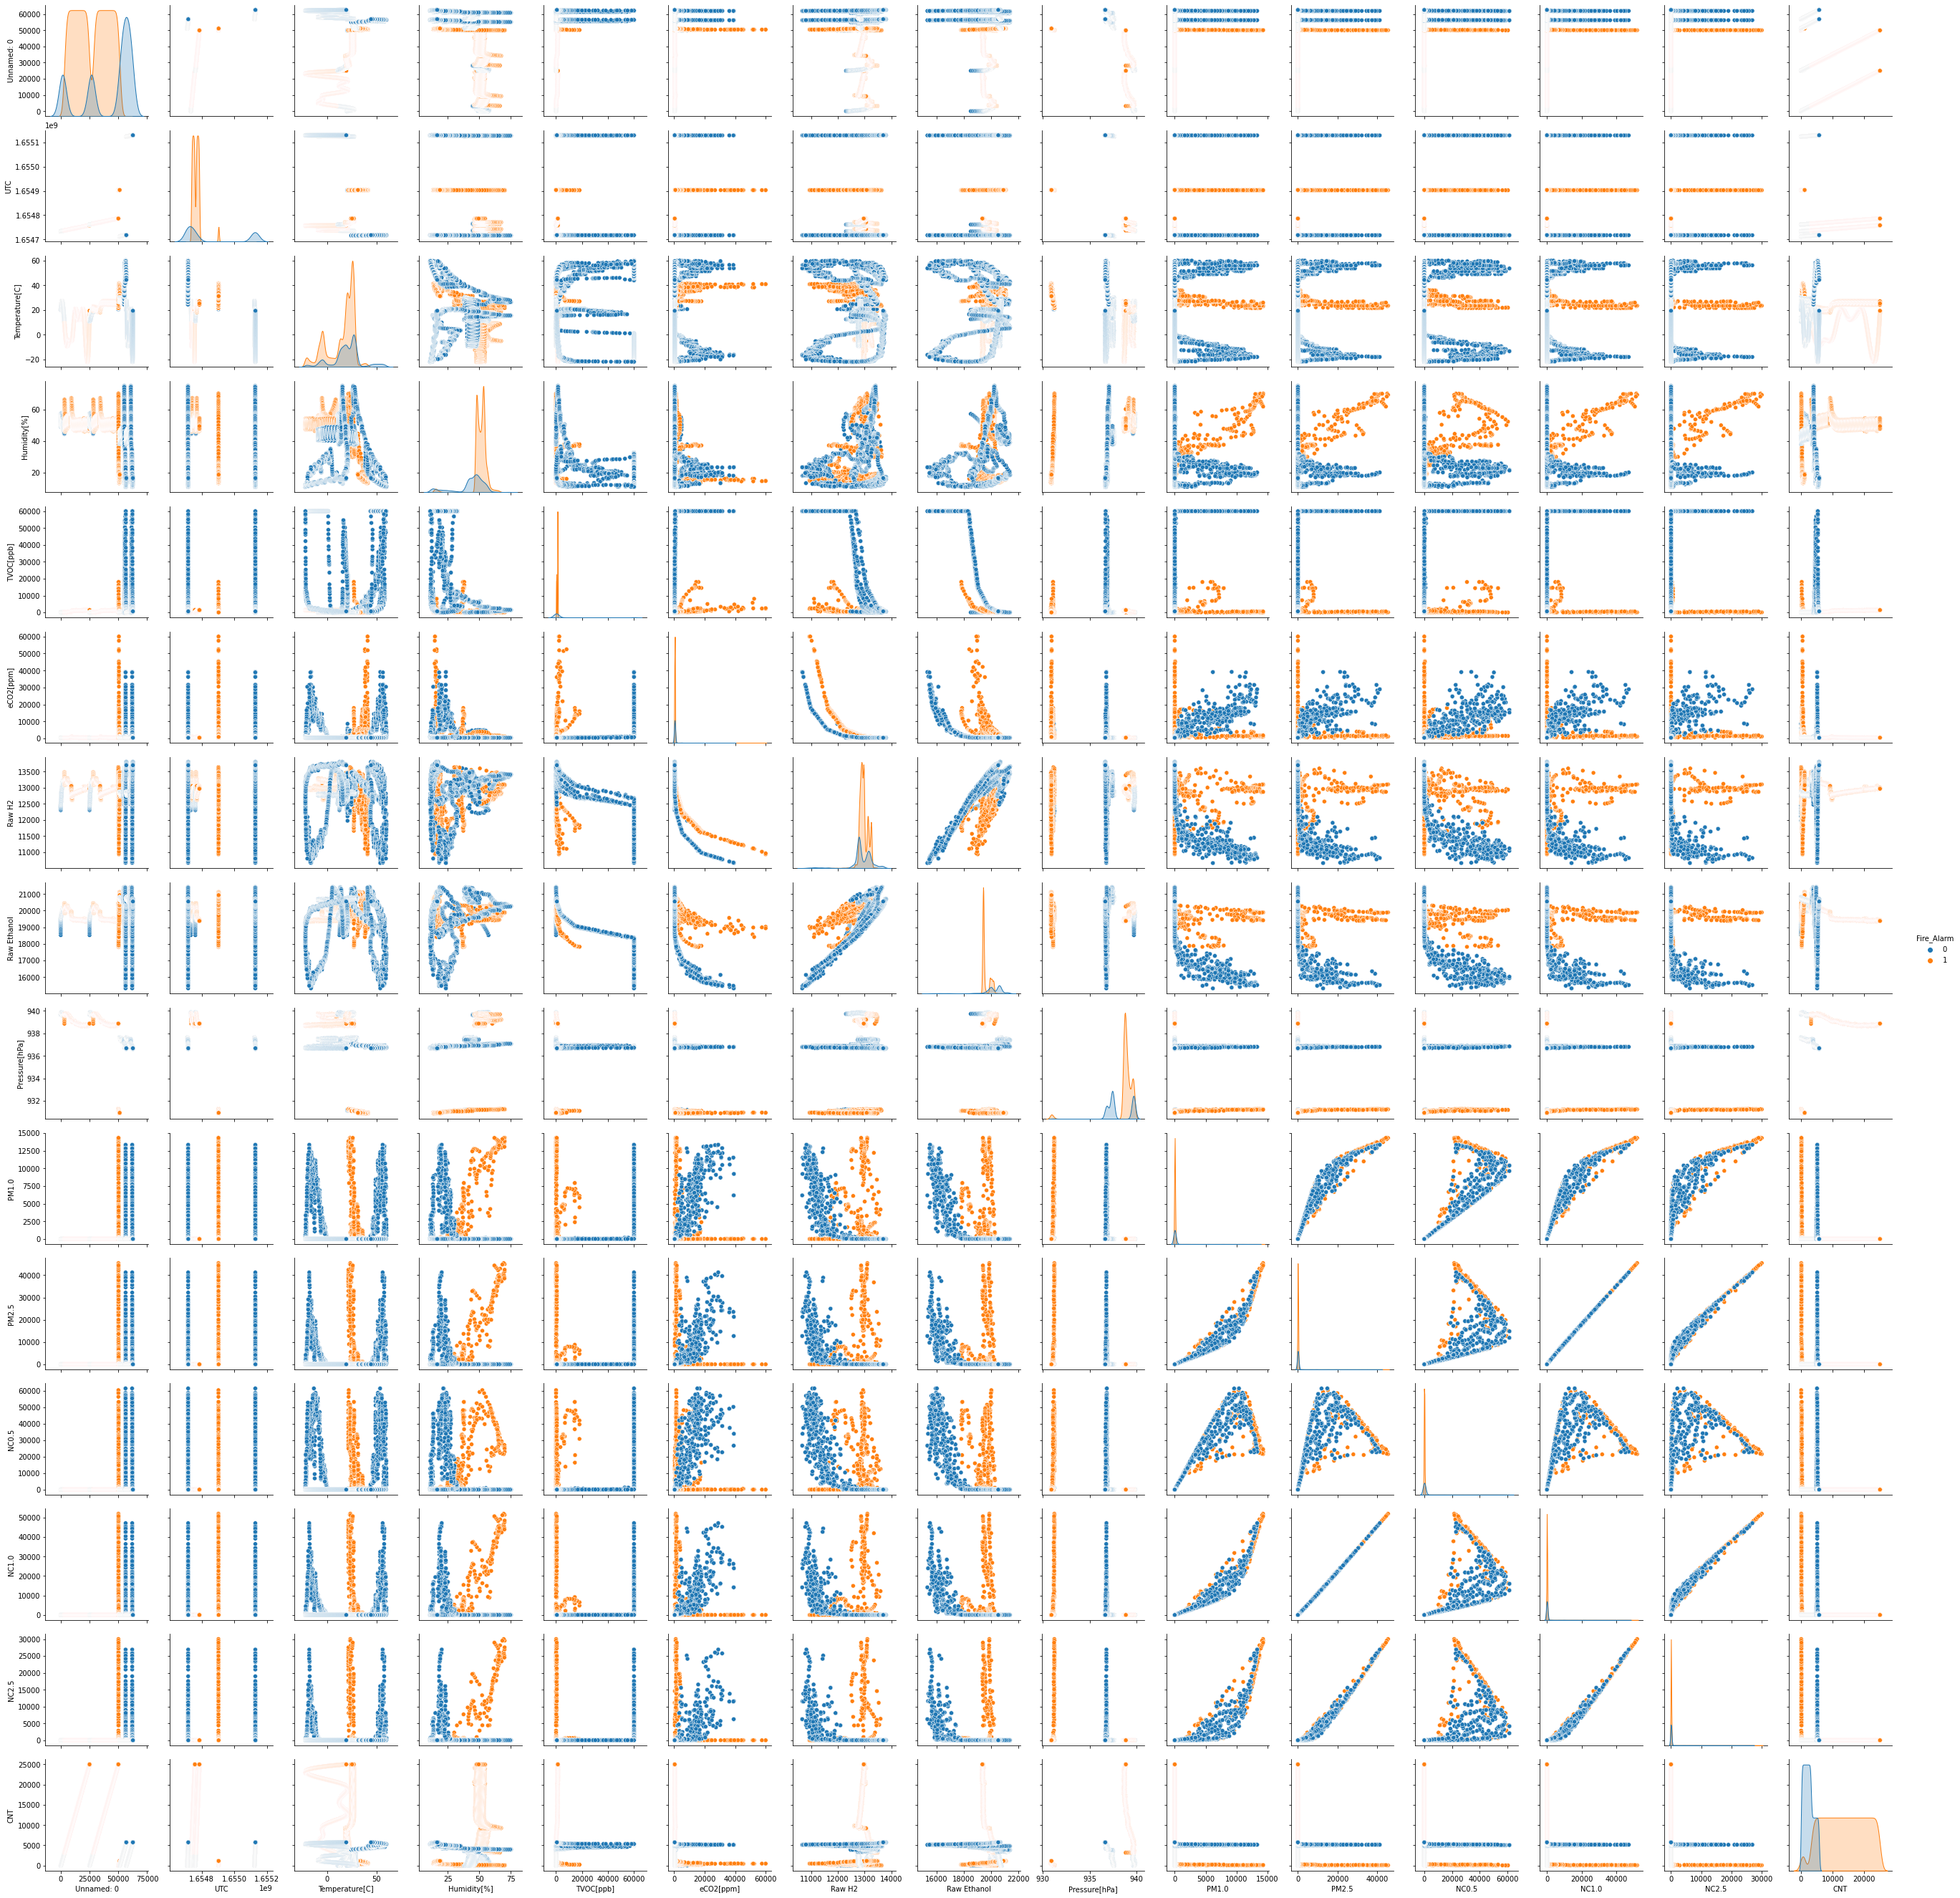

In [42]:
# ploting pairwise relationships in the dataset
sns.pairplot(df, hue='Fire_Alarm')

In [ ]:
X = df.drop(['Fire_Alarm'], axis=1)
y = df.Fire_Alarm

# train-dev-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=1)

In [43]:
# define the models
model = keras.models.Sequential([
  keras.layers.Dense(15, input_shape=(15, ), activation='relu', kernel_regularizer=keras.regularizers.l1(l=0.1)),
  keras.layers.Dense(32, activation='relu'),
  keras.layers.Dense(1, activation='sigmoid')
])

# compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Fit the model
start = time.time()
model.fit(X_train, y_train, epochs=20, batch_size=10, validation_data=(X_val, y_val))
end = time.time()
print('Time spent: '+str(end-start))

# model evaulation
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100))

Epoch 1/20
3758/3758 [==============================] - 16s 4ms/step - loss: 1397017.5000 - accuracy: 0.5916 - val_loss: 353513.9375 - val_accuracy: 0.2852
Epoch 2/20
3758/3758 [==============================] - 11s 3ms/step - loss: 625818.1250 - accuracy: 0.5966 - val_loss: 579606.8750 - val_accuracy: 0.7148
Epoch 3/20
3758/3758 [==============================] - 12s 3ms/step - loss: 453794.9688 - accuracy: 0.6008 - val_loss: 645136.4375 - val_accuracy: 0.7148
Epoch 4/20
3758/3758 [==============================] - 13s 3ms/step - loss: 299371.1875 - accuracy: 0.6023 - val_loss: 144588.2969 - val_accuracy: 0.7148
Epoch 5/20
3758/3758 [==============================] - 13s 4ms/step - loss: 216870.1875 - accuracy: 0.6058 - val_loss: 360185.4688 - val_accuracy: 0.7148
Epoch 6/20
3758/3758 [==============================] - 11s 3ms/step - loss: 135244.1250 - accuracy: 0.6149 - val_loss: 14447.5264 - val_accuracy: 0.4020
Epoch 7/20
3758/3758 [==============================] - 11s 3ms/step -

# Task 3
The model is defined with input_shape (15,), representing the input has 15 features. The input layer has 15 nodes, the hidden layer has 32 nodes, and the output layer has 1 node. The input layer and the hidden layer uses relu as an activation function and the ouput layer uses sigmoid as an activation function. The binary_crossentropy function is selected as the loss function. This function calculates a score that summarizes the average difference between the actual and predicted probability distributions.
The gradient descent optimizer is the Adam optimizer. The metrics used is accuracy. The L2 regularization is used to penalize the effects of the higher values. 

The epoch is the number of times this algorithm will go through the provided dataset, and batch is the number of samples to go through before updating the model. I limit the epoch to be 20, this is when I have achieved a very low loss value. 



# Task 4


In [ ]:
start = time.time()
model_ran = RandomForestClassifier().fit(X_train, y_train)
n_scores_ran = cross_val_score(model_ran, X_test, y_test, scoring='accuracy')
end = time.time()
print('Time spent: '+str(end-start))
print('Accuracy: %.3f' % (mean(n_scores_ran)))

Time spent: 10.895201683044434
Accuracy: 1.000


Another baseline model I have created is the Random Forest Classifier. And amazingly, it has achieved 100% accuracy. It is also taking a lot less time. This is largely because of the nature of the data. I have noticed that there are some extremely indicative combinations, like PM1.0 and pressure or PM2.5 and pressure. These may be a reason why Random Forest has such a good performance. It also can be that the Random Forest Classifier from the library is fully optimized, and the neural networks I am writing has only two layers, and these hyperparameters are only moderatly tuned.